##### Library Import

In [66]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

##### SEED 설정
* 재현성과 일관성을 보장을 위함

In [67]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)

##### Train Data Load

In [68]:
train_df = pd.read_csv('./data/smoke_status/train.csv')

In [69]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


* 각종 생체 정보를 담고 있으며, 성별에 대한 구분은 존재하지 않는다.
* smoking == 0 은 비흡연, smoking == 1은 흡연

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

* int 및 float 형태의 데이터로 이루어져있다.

In [71]:
train_df.shape

(159256, 24)

* 행의 갯수는 159,256개이고, 열(특징)의 수는 24개로 이루어진 데이터이다.

In [72]:
train_df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

* 결측치는 존재하지 않은 것으로 보인다.

In [73]:
train_df.duplicated().sum()

0

* 중복 데이터 또한 존재하지 않은 것으로 보인다.

In [74]:
print(train_df.describe())

                  id            age     height(cm)     weight(kg)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean    79627.500000      44.306626     165.266929      67.143662   
std     45973.391572      11.842286       8.818970      12.586198   
min         0.000000      20.000000     135.000000      30.000000   
25%     39813.750000      40.000000     160.000000      60.000000   
50%     79627.500000      40.000000     165.000000      65.000000   
75%    119441.250000      55.000000     170.000000      75.000000   
max    159255.000000      85.000000     190.000000     130.000000   

           waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  159256.000000   159256.000000    159256.000000  159256.000000   
mean       83.001990        1.005798         1.000989       1.023974   
std         8.957937        0.402113         0.392299       0.152969   
min        51.000000        0.100000         0.100000       1.000000   
25%        77.0000

##### 흡연자, 비흡연자 비율

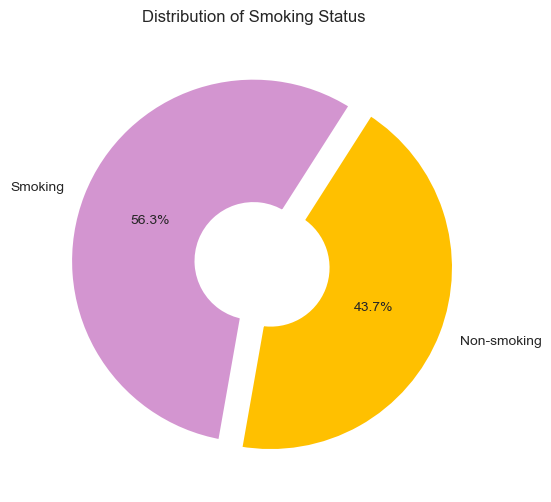

In [75]:
# 'smoking' 열의 값 빈도 계산
smoking_counts = train_df['smoking'].value_counts()

# 파이 차트 그리기
labels = ['Non-smoking', 'Smoking']
colors = ['#ffc000', '#d395d0']
sizes = [smoking_counts[1], smoking_counts[0]]
explode = (0.1, 0)
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(8, 6))
plt.pie(sizes,  explode=explode, labels=labels,colors=colors,  autopct='%1.1f%%', startangle=260,wedgeprops=wedgeprops)
plt.title('Distribution of Smoking Status')
plt.show()

* 흡연자에 대한 데이터가 비흡연자에 대한 데이터보다 12.6%p 많다.
* 모델 학습에 큰 영향을 끼칠만한 데이터 분포는 아닌 것으로 생각된다.

##### 상관 계수

In [76]:
corr_df = train_df.drop(['id'], axis=1)

corr_df['dental caries'] = corr_df['dental caries'] + 1
corr_df['smoking'] = corr_df['smoking'] + 1

corr_df['dental caries'].describe()

count    159256.000000
mean          1.197996
std           0.398490
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: dental caries, dtype: float64

* 상관 계수 계산시 분모가 0이 되는 걸 방지하기 위해, dental caries, smoking 데이터에 1을 더한 후 진행

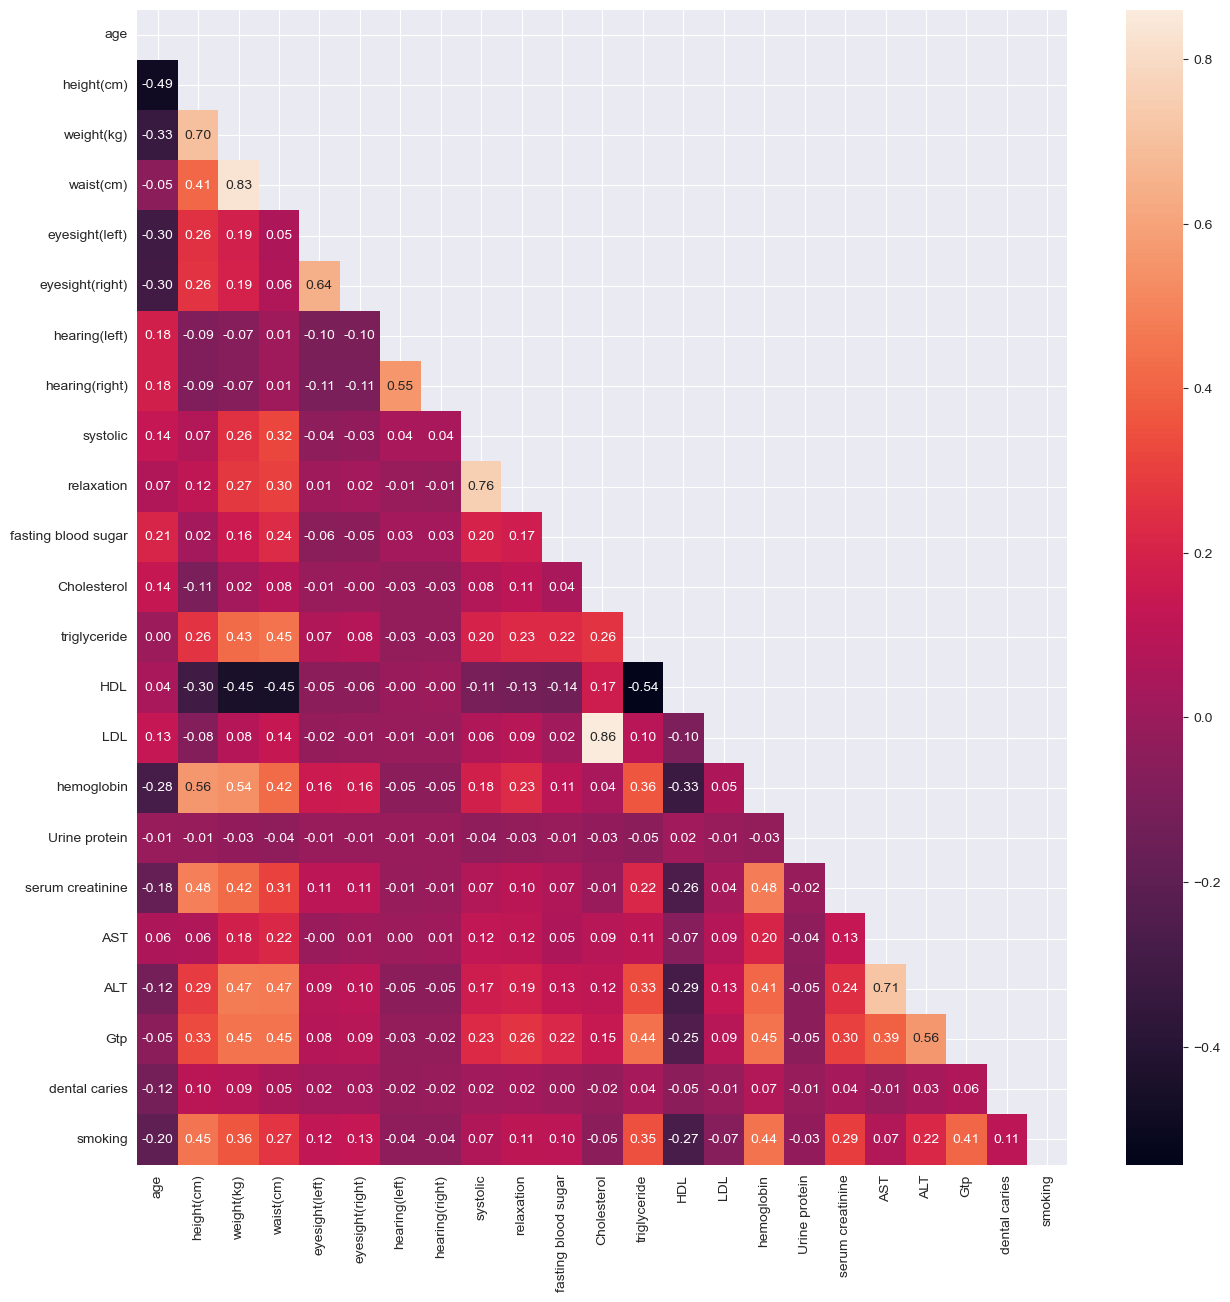

In [77]:
# 상관 행렬 계산
corr_matrix = np.log(corr_df).corr()

# 하삼각 행렬 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 생성
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask)
plt.show()

* height, weight, waist(cm), triglyceride, hemoglobin, serum creatinine, Gtp 해당 열이 흡연 여부에 대해 양의 상관 관계를 보인다.
* age, HDL 해당 열을 음의 상관 관계를 보인다.

##### 열(특징)의 분포도 및 이상치 확인

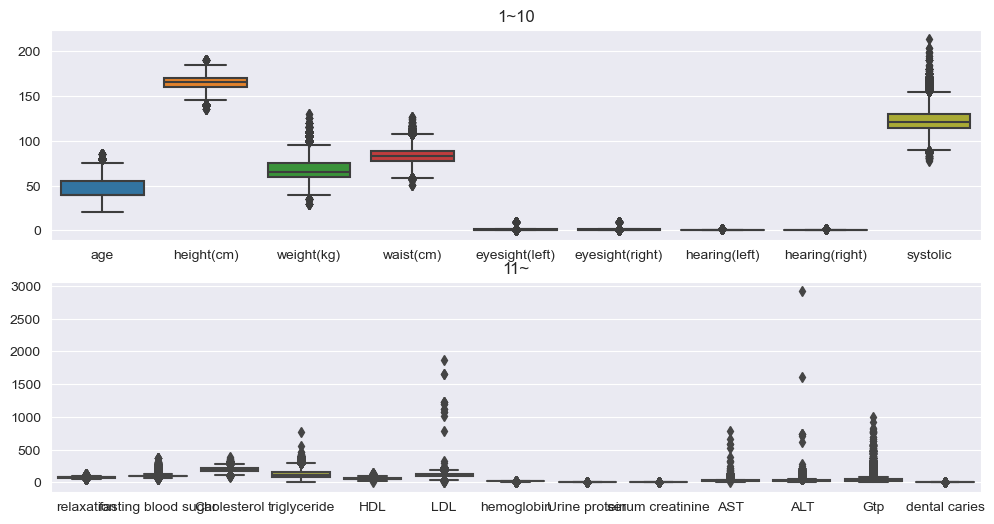

In [78]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.boxplot(data=train_df.iloc[:, 1:10], ax=axes[0])
axes[0].set_title('1~10')

sns.boxplot(data=train_df.iloc[:, 10:23], ax=axes[1])
axes[1].set_title('11~')

plt.show()

##### 무작위로 표본 추출하여 분포도 확인

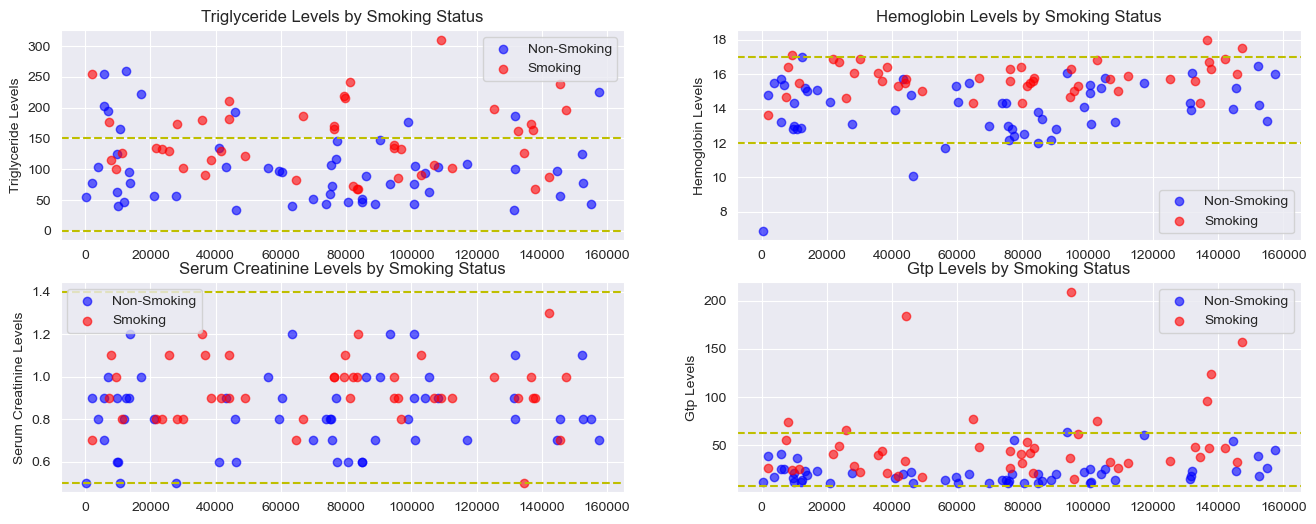

In [80]:
sampled_df = train_df.sample(n=100, random_state=SEED)

# 흡연자와 비흡연자 데이터 분리
smokers = sampled_df[sampled_df['smoking'] == 1]
non_smokers = sampled_df[sampled_df['smoking'] == 0]

# 산점도 그리기
plt.figure(figsize=(16, 6))

# Triglyceride Levels 산점도
plt.subplot(2, 2, 1)
plt.scatter(non_smokers.index, non_smokers['triglyceride'], color='b', label='Non-Smoking', alpha=0.6)
plt.scatter(smokers.index, smokers['triglyceride'], color='r', label='Smoking', alpha=0.6)
plt.axhline(y=0.0, color='y', linestyle='--')
plt.axhline(y=150, color='y', linestyle='--')
plt.ylabel('Triglyceride Levels')
plt.title('Triglyceride Levels by Smoking Status')
plt.legend()

# Hemoglobin Levels 산점도
plt.subplot(2, 2, 2)
plt.scatter(non_smokers.index, non_smokers['hemoglobin'], color='b', label='Non-Smoking', alpha=0.6)
plt.scatter(smokers.index, smokers['hemoglobin'], color='r', label='Smoking', alpha=0.6)
plt.axhline(y=12.0, color='y', linestyle='--')
plt.axhline(y=17.0, color='y', linestyle='--')
plt.ylabel('Hemoglobin Levels')
plt.title('Hemoglobin Levels by Smoking Status')
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.scatter(non_smokers.index, non_smokers['serum creatinine'], color='b', label='Non-Smoking', alpha=0.6)
plt.scatter(smokers.index, smokers['serum creatinine'], color='r', label='Smoking', alpha=0.6)
plt.axhline(y=0.5, color='y', linestyle='--')
plt.axhline(y=1.4, color='y', linestyle='--')
plt.ylabel('Serum Creatinine Levels')
plt.title('Serum Creatinine Levels by Smoking Status')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(non_smokers.index, non_smokers['Gtp'], color='b', label='Non-Smoking', alpha=0.6)
plt.scatter(smokers.index, smokers['Gtp'], color='r', label='Smoking', alpha=0.6)
plt.axhline(y=8.0, color='y', linestyle='--')
plt.axhline(y=63.0, color='y', linestyle='--')
plt.ylabel('Gtp Levels')
plt.title('Gtp Levels by Smoking Status')
plt.legend()
plt.show()

* 노란선은 적정범위를 지정했습니다. 주어진 데이터에는 성별에 대한 데이터가 주어지지 않았기 때문에 감안할 필요가 있습니다.
* 표본은 무작위(Random)으로 설정하였습니다.(SEED는 고정)
* triglyceride(중성지방) 수치는 흡연자가 상대적으로 높은 것으로 나타납니다.
* hemoglobin(헤모글로빈) 수치는 흡연 여부 상관 없이 적정 범위내 입니다. 하지만 비교적 흡연자가 적정 범위 내에서 높은 수치를 가지고 있습니다.
* serum creatinine(혈청 크레아티닌) 수치는 흡연 여부와 상관 없이 적정 범위 내입니다.
* Gtp(감마Gtp) 수치는 흡연자가 높은 수치를 가지고 있음을 나타냅니다.

###### systolic, triglyceride, LDL, AST, ALT, Gtp 열의 분포

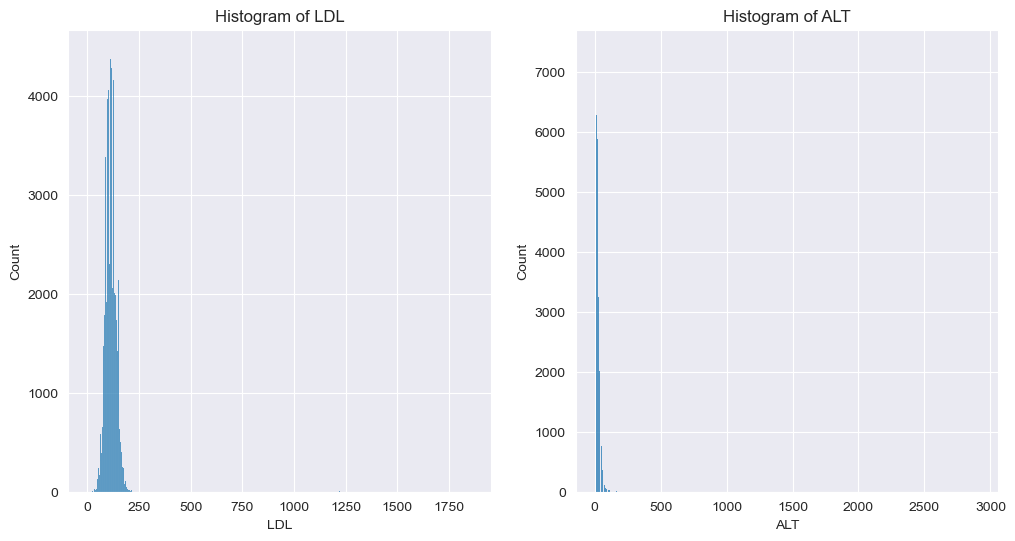

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=train_df, x='LDL', ax=axes[0])
axes[0].set_title('Histogram of LDL')

sns.histplot(data=train_df, x='ALT', ax=axes[1])
axes[1].set_title('Histogram of ALT')

plt.show()

##### IQR(사분범위)를 이용하여 이상치 제거(LDL, ALT)

In [81]:
def remove_outliers_iqr_columns(df, column_names):
    df_out = df.copy()
    for column_name in column_names:
        Q1 = df_out[column_name].quantile(0.25)
        Q3 = df_out[column_name].quantile(0.75)
        IQR = Q3 - Q1
        # IQR 범위를 벗어난 값을 제외
        df_out = df_out[~((df_out[column_name] < (Q1 - 1.5 * IQR)) | (df_out[column_name] > (Q3 + 1.5 * IQR)))]
    return df_out

filter_df = remove_outliers_iqr_columns(train_df, ['LDL', 'ALT'])

* IQR = Q3(75%) - Q1(25%)
* Q1 - IQR * 1.5보다 작거나 Q3 + IQR * 1.5 보다 큰 데이터를 이상치라 판단하고 제거

In [82]:
filter_df.shape

(152057, 24)

* 기존 159,256 행에서 152,057 행으로 약 7000개의 데이터 이상치가 제거 

###### Test Data Load

In [83]:
test_df = pd.read_csv('./data/smoke_status/test.csv')

###### MinMaxScaler 정규화

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_data = scaler.fit_transform(filter_df)
sub_data = scaler.fit_transform(test_df)

norm_df = pd.DataFrame(norm_data, columns=filter_df.columns)
sub_df = pd.DataFrame(sub_data, columns=test_df.columns)

print(norm_df.head(5))
print(sub_df.head(5))

         id       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  0.000000  0.538462    0.545455        0.30   0.394737        0.040816   
1  0.000006  0.769231    0.545455        0.35   0.500000        0.051020   
2  0.000013  0.000000    0.636364        0.45   0.394737        0.030612   
3  0.000019  0.230769    0.818182        0.65   0.710526        0.142857   
4  0.000025  0.153846    0.545455        0.30   0.388158        0.142857   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...       HDL  \
0         0.051020            0.0             0.0  0.426471  ...  0.244094   
1         0.061224            1.0             1.0  0.507353  ...  0.377953   
2         0.040816            0.0             0.0  0.301471  ...  0.283465   
3         0.112245            0.0             0.0  0.397059  ...  0.228346   
4         0.091837            0.0             0.0  0.323529  ...  0.275591   

        LDL  hemoglobin  Urine protein  serum creatinine       AST       A

###### Random Forset Model & XGBoost Model

In [85]:
X = norm_df.drop(['id', 'smoking', 'hearing(left)', 'hearing(right)', 'Urine protein'], axis=1)
sub_df = sub_df.drop(['id', 'hearing(left)', 'hearing(right)', 'Urine protein'], axis=1)

y = norm_df['smoking']

###### Optuna 하이퍼 파라미터 튜닝

In [96]:
import optuna
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

def objective_decision_tree(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 5, 20) 
    }
    model = DecisionTreeClassifier(**params, random_state=SEED)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

def objective_random_forest(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200), 
        'max_depth': trial.suggest_int('max_depth', 5, 20),  
        'n_jobs': -1  # 병렬 처리
    }
    model = RandomForestClassifier(**params, random_state=SEED)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

def objective_gradient_boosting(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),  
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),  
        'max_depth': trial.suggest_int('max_depth', 5, 20) 
    }
    model = GradientBoostingClassifier(**params, random_state=SEED)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

def objective_adaboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),  
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1) 
    }
    model = AdaBoostClassifier(**params, random_state=SEED)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

def objective_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),  
        'max_depth': trial.suggest_int('max_depth', 5, 20),  
        'n_jobs': -1,  # 병렬 처리
        'subsample': trial.suggest_float('subsample', 0.5, 1.0), 
        'gamma': trial.suggest_float('gamma', 0.0, 1.0)  
    }
    model = XGBClassifier(**params, random_state=SEED, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

# Optuna study for each model
study_decision_tree = optuna.create_study(direction='maximize')
study_decision_tree.optimize(objective_decision_tree, n_trials=10)

study_random_forest = optuna.create_study(direction='maximize')
study_random_forest.optimize(objective_random_forest, n_trials=10)

study_gradient_boosting = optuna.create_study(direction='maximize')
study_gradient_boosting.optimize(objective_gradient_boosting, n_trials=10)

study_adaboost = optuna.create_study(direction='maximize')
study_adaboost.optimize(objective_adaboost, n_trials=10)

study_xgboost = optuna.create_study(direction='maximize')
study_xgboost.optimize(objective_xgboost, n_trials=10)

[I 2024-06-04 13:35:36,850] A new study created in memory with name: no-name-3925b650-cb58-43de-954e-e7c8f81302cb
[I 2024-06-04 13:35:37,836] Trial 0 finished with value: 0.8026650943875315 and parameters: {'max_depth': 13}. Best is trial 0 with value: 0.8026650943875315.
[I 2024-06-04 13:35:38,141] Trial 1 finished with value: 0.8340344919011301 and parameters: {'max_depth': 5}. Best is trial 1 with value: 0.8340344919011301.
[I 2024-06-04 13:35:38,926] Trial 2 finished with value: 0.8172541929087318 and parameters: {'max_depth': 12}. Best is trial 1 with value: 0.8340344919011301.
[I 2024-06-04 13:35:40,011] Trial 3 finished with value: 0.7704532335202363 and parameters: {'max_depth': 15}. Best is trial 1 with value: 0.8340344919011301.
[I 2024-06-04 13:35:40,565] Trial 4 finished with value: 0.8400666179206261 and parameters: {'max_depth': 9}. Best is trial 4 with value: 0.8400666179206261.
[I 2024-06-04 13:35:42,029] Trial 5 finished with value: 0.698364441244167 and parameters: {'

In [97]:
optuna.visualization.plot_optimization_history(study_decision_tree).show()
print("Decision Tree Best Value : ", study_decision_tree.best_value)
print("Decision Tree Best Parameters : ", study_decision_tree.best_params)

optuna.visualization.plot_optimization_history(study_random_forest).show()
print("Random Forest Best Value : ", study_random_forest.best_value)
print("Random Forest Best Parameters : ", study_random_forest.best_params)

optuna.visualization.plot_optimization_history(study_gradient_boosting).show()
print("Gradient Boosting Best Value : ", study_gradient_boosting.best_value)
print("Gradient Boosting Best Parameters : ", study_gradient_boosting.best_params)

optuna.visualization.plot_optimization_history(study_adaboost).show()
print("Adaboost Best Value : ", study_adaboost.best_value)
print("Adaboost Best Parameters : ", study_adaboost.best_params)

optuna.visualization.plot_optimization_history(study_xgboost).show()
print("XGBoost Best Value : ", study_xgboost.best_value)
print("XGBoost Best Parameters : ", study_xgboost.best_params)

Decision Tree Best Value :  0.8400666179206261
Decision Tree Best Parameters :  {'max_depth': 9}


Random Forest Best Value :  0.8632520062257626
Random Forest Best Parameters :  {'n_estimators': 157, 'max_depth': 19}


Gradient Boosting Best Value :  0.8682432631149531
Gradient Boosting Best Parameters :  {'n_estimators': 189, 'learning_rate': 0.04739334433220392, 'max_depth': 10}


Adaboost Best Value :  0.8484951970960102
Adaboost Best Parameters :  {'n_estimators': 173, 'learning_rate': 0.09137598545603497}


XGBoost Best Value :  0.8695151099625361
XGBoost Best Parameters :  {'n_estimators': 191, 'learning_rate': 0.0736326575499142, 'max_depth': 9, 'subsample': 0.8412869643532417, 'gamma': 0.6159539456123198}


In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 학습-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 최적의 파라미터로 모델 생성
xgb = XGBClassifier(**study_xgboost.best_params, random_state=SEED)

# 모델 학습
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("XGB AUC : ", auc_xgb)

pred_sub = xgb.predict_proba(sub_df)[:, 1]
sub_xgb = pd.DataFrame({'id': test_df['id'], 'smoking': pred_sub})
sub_xgb.head()

XGB AUC :  0.8695151099625361


,id,smoking
0,159256,0.749420
1,159257,0.279146
2,159258,0.752647
3,159259,0.025314
4,159260,0.899440


* Optuna 하이퍼 파라미터 튜닝을 진행한 5가지 모델 중 가장 Value(AUC)가 높은 XGBoost 모델로 예측 진행
* XGB AUC : 0.8695151099625361

In [102]:
sub_xgb.to_csv('./result/preSmoke_xgb.csv', index=False)

* Optuna를 이용하여 하이퍼 파라미터 튜닝을 진행
* 최적의 파라미터를 토대로 XGB 모델 생성
* 제출용 데이터 예측 진행

###### Stacking Ensemble

In [100]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 학습-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 기본 모델 초기화
base_models = [
    DecisionTreeClassifier(**study_decision_tree.best_params, random_state=SEED),
    RandomForestClassifier(**study_random_forest.best_params, random_state=SEED),
    GradientBoostingClassifier(**study_gradient_boosting.best_params, random_state=SEED),
    AdaBoostClassifier(**study_adaboost.best_params, random_state=SEED),
    XGBClassifier(**study_xgboost.best_params, random_state=SEED)
]

def get_stacking_data(X_train, y_train, X_test, SEED, n_splits=5):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    new_X_train = np.zeros((X_train.shape[0], len(base_models)))
    new_X_test = np.zeros((X_test.shape[0], len(base_models)))

    for i, model in enumerate(base_models):
        fold_pred_train = np.zeros(X_train.shape[0])
        fold_pred_test = np.zeros((X_test.shape[0], n_splits))

        for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
            X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_fold_train, y_fold_train)
            fold_pred_train[val_index] = model.predict_proba(X_fold_val)[:, 1]
            fold_pred_test[:, fold_idx] = model.predict_proba(X_test)[:, 1]

        new_X_train[:, i] = fold_pred_train
        new_X_test[:, i] = fold_pred_test.mean(axis=1)
        
    return new_X_train, new_X_test

def stacking_model_pred(new_X_train, new_X_test, sub_df):
    # 메타 모델 학습
    meta_lr = LogisticRegression(random_state=SEED)
    meta_lr.fit(new_X_train, y_train)

    meta_pred_test = meta_lr.predict_proba(new_X_test)[:, 1]
    meta_auc_test = roc_auc_score(y_test, meta_pred_test)

    # 새로운 제출 데이터 생성
    new_sub_data = np.zeros((sub_df.shape[0], len(base_models)))
    for i, model in enumerate(base_models):
        new_sub_data[:, i] = model.predict_proba(sub_df)[:, 1]

    # 최종 예측
    stacking_pred = meta_lr.predict_proba(new_sub_data)[:, 1]

    return stacking_pred, meta_auc_test

train, test = get_stacking_data(X_train, y_train, X_test, SEED)
pred, auc = stacking_model_pred(train, test, sub_df)
print("Stacking Model AUC : ", auc)

# 제출용 DataFrame 생성
submission_df = pd.DataFrame({'id': test_df['id'], 'smoking': pred})
submission_df.head()

Stacking Model AUC :  0.8703523006891773


,id,smoking
0,159256,0.777149
1,159257,0.255022
2,159258,0.825015
3,159259,0.090068
4,159260,0.840711


* Base Model : DecisionTree, Random Forest, GradientBoosting, AdaBoost, XGBoost
* Meta Model : LogisticRegression
* 최종 AUC : 0.8703523006891773
* train 데이터를 StratifiedKFold 하여 과적합을 줄이고, 예측된 값으로 새로운 데이터 셋 생성
* 새로운 데이터 셋으로 LogisticRegression 진행

In [103]:
submission_df.to_csv('./result/preSmoke_stacking.csv', index=False)